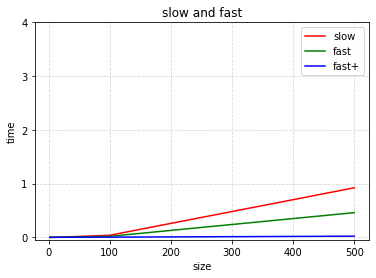

In [27]:
import numpy as np
from timeit import timeit
def slow_matvec(matrix, vector):
    assert matrix.shape[1] == vector.shape[0]
    result = []
    for r in range(matrix.shape[0]):
        value = 0
        for c in range(matrix.shape[1]):
            value += matrix[r, c] * vector[c]
        result.append(value)
    return np.array(result)

def fast_plus_matvec(matrix, vector):
    assert matrix.shape[1] == vector.shape[0]
    result = []
    for r in range(matrix.shape[0]):
        val = 0
        tem = matrix[r]*vector
#         for c in range(tem.shape[0]):
#             val += tem[c]
        val = np.sum(tem)
        result.append(val)
    return np.array(result)

def fast_matvec(matrix, vector):
    assert matrix.shape[1] == vector.shape[0]
    result = []
    for r in range(matrix.shape[0]):
        val = 0
        tem = matrix[r]*vector
        for c in range(tem.shape[0]):
            val += tem[c]
        result.append(val)
    return np.array(result)

mv_size = [2,10,100,500]
t1 = []
t2 = []
t3 = []
for s in mv_size:
    matrix = np.random.rand(s, s)
    vector = np.random.rand(s)
    ts = timeit(lambda:slow_matvec(matrix, vector), number =10)
    t1.append(ts)
    tf = timeit(lambda:fast_matvec(matrix, vector), number =10)
    t2.append(tf)
    tfp = timeit(lambda:fast_plus_matvec(matrix, vector), number =10)
    t3.append(tfp)

import matplotlib.pylab as plt
plt.plot(mv_size, t1, c='red', label="slow")
plt.plot(mv_size, t2, c='green', label="fast")
plt.plot(mv_size, t3, c='blue', label="fast+")
plt.legend(loc='best')
plt.yticks(range(0, 5, 1))
plt.grid(True, linestyle='--', alpha=0.5)
plt.xlabel("size")
plt.ylabel("time")
plt.title("slow and fast")
plt.show()
# print(fast_matvec(matrix, vector))
# print(matrix @ vector)


In [37]:
# test = np.random.rand(3, 3)
# test2 = np.random.rand(3, 3)
# print(test)
# test3 = test[0]*test2
# print(test3)
# print(np.sum(test3,axis = 0))

[[0.77858632 0.44136718 0.70228224]
 [0.82272296 0.43209966 0.08103942]
 [0.32412196 0.17487573 0.09666287]]
[[0.02030871 0.37069303 0.3861039 ]
 [0.35680821 0.23960006 0.12638062]
 [0.6079141  0.002855   0.66995201]]
[0.98503101 0.61314809 1.18243653]


1000


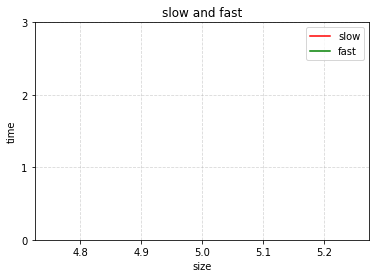

In [54]:
import numpy as np


def fast_matrix_product(mat1, mat2):
    """Multiply two matrices."""
    assert mat1.shape[1] == mat2.shape[0]
    result = []
    for c in range(mat2.shape[1]):
        column = []
#         tem = []
#         tem = np.transpose([mat1[c,:]])*mat2
        column = np.sum(np.transpose([mat1[c,:]])*mat2, axis=0)
#         for r in range(mat1.shape[0]):
#             value = 0
#             for i in range(mat1.shape[1]):
#                 value += mat1[r, i] * mat2[i, c]
#             column.append(value)
        result.append(column)
    return np.array(result).transpose()
def slow_matrix_product(mat1, mat2):
    """Multiply two matrices."""
    assert mat1.shape[1] == mat2.shape[0]
    result = []
    for c in range(mat2.shape[1]):
        column = []
        for r in range(mat1.shape[0]):
            value = 0
            for i in range(mat1.shape[1]):
                value += mat1[r, i] * mat2[i, c]
            column.append(value)
        result.append(column)
    return np.array(result).transpose()


# matrix1 = np.random.rand(3, 3)
# matrix2 = np.random.rand(3, 3)

# print(slow_matrix_product(matrix1, matrix2))
# print(matrix1 @ matrix2)
mv_size = [5,10,50,100,200,250,1000]
t1 = []
t2 = []
for s in mv_size:
    matrix1 = np.random.rand(s,s)
    matrix2 = np.random.rand(s,s)
    print(s)
    ts = timeit(lambda:slow_matvec(matrix1, matrix2), number =1)
    t1.append(ts)
    tf = timeit(lambda:fast_matvec(matrix1, matrix2), number =1)
    t2.append(tf)
#     tfp = timeit(lambda:fast_plus_matvec(matrix, vector), number =10)
#     t3.append(tfp)

import matplotlib.pylab as plt
plt.plot(mv_size, t1, c='red', label="slow")
plt.plot(mv_size, t2, c='green', label="fast")
# plt.plot(mv_size, t3, c='blue', label="fast+")
plt.legend(loc='best')
plt.yticks(range(0, 4, 1))
plt.grid(True, linestyle='--', alpha=0.5)
plt.xlabel("size")
plt.ylabel("time")
plt.title("slow and fast")
plt.show()